### Підготовка даних

In [346]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import pandas as pd 

from keras import utils
from keras import layers
from keras import optimizers
from keras import losses
from keras import models

In [347]:
df = pd.read_csv('iris.csv')

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [349]:
def get_nominal_integer_dict(nominal_vals):
    d = {}
    for val in nominal_vals:
        if val not in d:
            current_max = max(d.values()) if len(d) > 0 else -1
            d[val] = current_max+1
    return d


def convert_to_integer(srs):
    d = get_nominal_integer_dict(srs)
    return srs.map(lambda x: d[x])

def convert_strings_to_integer(df):
    ret = pd.DataFrame()
    for column_name in df:
        column = df[column_name]
        if column.dtype=='string' or column.dtype=='object':
            ret[column_name] = convert_to_integer(column)
        else:
            ret[column_name] = column
    return ret


In [350]:
df = convert_strings_to_integer(df)

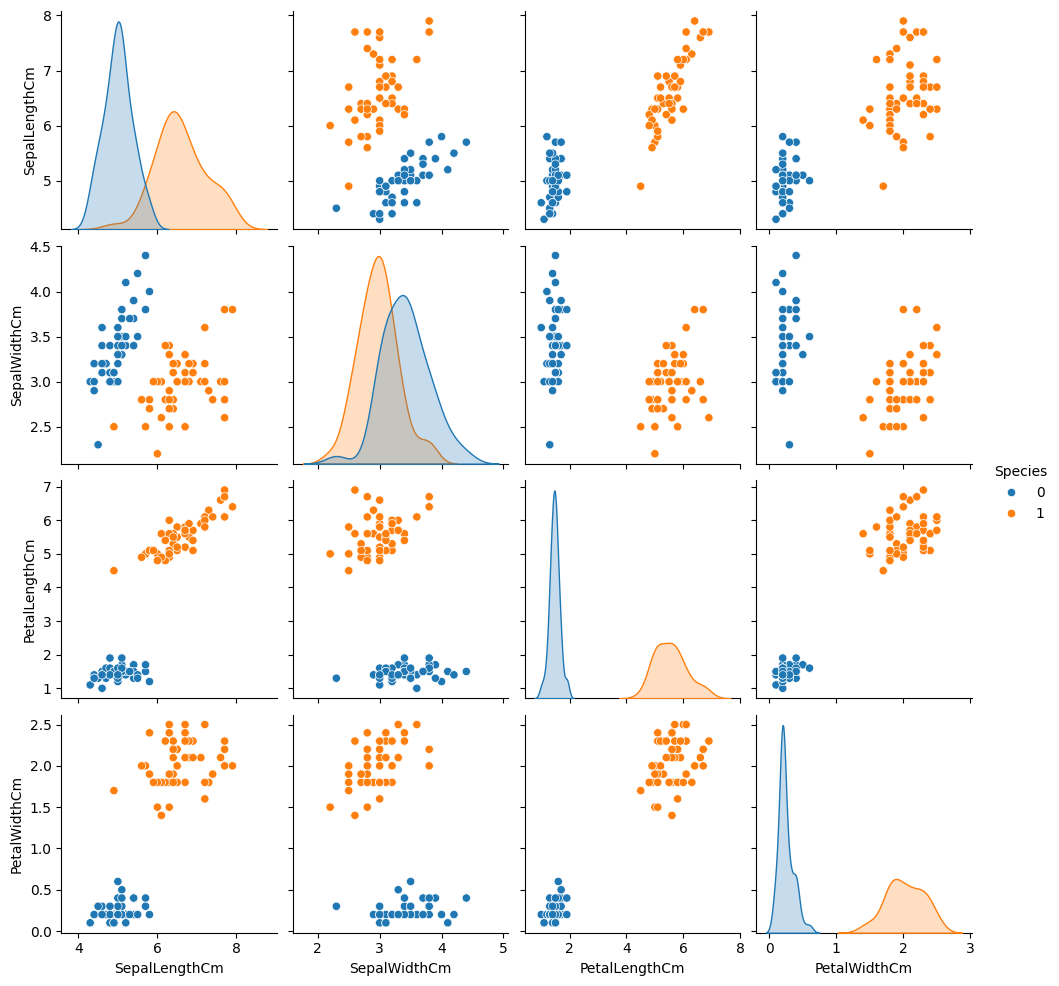

In [351]:
import seaborn as sns
    
sns.pairplot(df, hue='Species')

In [352]:
x_train =df.iloc[:,[0,1,2,3]]
print(x_train)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0             5.1           3.5            1.4           0.2
1             4.9           3.0            1.4           0.2
2             4.7           3.2            1.3           0.2
3             4.6           3.1            1.5           0.2
4             5.0           3.6            1.4           0.2
..            ...           ...            ...           ...
95            6.7           3.0            5.2           2.3
96            6.3           2.5            5.0           1.9
97            6.5           3.0            5.2           2.0
98            6.2           3.4            5.4           2.3
99            5.9           3.0            5.1           1.8

[100 rows x 4 columns]


In [353]:

y = df.iloc[:,[4]]
print(y)

    Species
0         0
1         0
2         0
3         0
4         0
..      ...
95        1
96        1
97        1
98        1
99        1

[100 rows x 1 columns]


In [354]:

y_train = utils.to_categorical(y,2)
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [355]:
logistic = models.Sequential()
logistic.add(layers.Dense(4, activation='relu', input_shape=(4,)))
logistic.add(layers.Dense(units=2, activation='softmax'))
logistic.compile(optimizer='adam', loss='mse', metrics=['mae' ,'accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [356]:
logistic.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5115 - loss: 0.4758 - mae: 0.4996  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5094 - loss: 0.4746 - mae: 0.5008
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.4917 - loss: 0.4902 - mae: 0.5185
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.4979 - loss: 0.4807 - mae: 0.5122
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.5000 - loss: 0.4763 - mae: 0.5104
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5510 - loss: 0.4259 - mae: 0.4641
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.4844 - loss: 0.4841 - mae: 0.5244
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5104 - loss: 0.4566 - mae: 0.5013
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.5177 - loss: 0.4460 - mae: 0.4950
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.5250 - loss: 0.4364 - mae: 0.4886
Epoch 11/

In [357]:
y_logictic = logistic.predict_on_batch(x_train)
print(y_logictic)

[[0.59034777 0.40965223]
 [0.5635882  0.4364118 ]
 [0.56921184 0.43078813]
 [0.56231844 0.43768156]
 [0.59302473 0.4069752 ]
 [0.5969475  0.40305257]
 [0.5679041  0.43209592]
 [0.58372444 0.41627562]
 [0.54937506 0.45062494]
 [0.57647973 0.42352018]
 [0.6048191  0.39518085]
 [0.5797726  0.42022732]
 [0.5701571  0.4298428 ]
 [0.56117845 0.43882152]
 [0.62604886 0.37395108]
 [0.6251944  0.37480566]
 [0.59765714 0.40234286]
 [0.5819775  0.41802248]
 [0.6062776  0.3937224 ]
 [0.59547746 0.4045225 ]
 [0.59088224 0.40911785]
 [0.58256626 0.41743374]
 [0.5862361  0.41376397]
 [0.5552745  0.44472548]
 [0.57923347 0.42076662]
 [0.5651313  0.4348686 ]
 [0.56668293 0.43331704]
 [0.592043   0.40795702]
 [0.58766544 0.4123346 ]
 [0.56866914 0.43133083]
 [0.56594926 0.4340508 ]
 [0.5744609  0.42553905]
 [0.6271287  0.37287128]
 [0.6290719  0.37092805]
 [0.57647973 0.42352018]
 [0.5750852  0.42491484]
 [0.5980023  0.40199775]
 [0.57647973 0.42352018]
 [0.554215   0.44578496]
 [0.5856068  0.41439325]


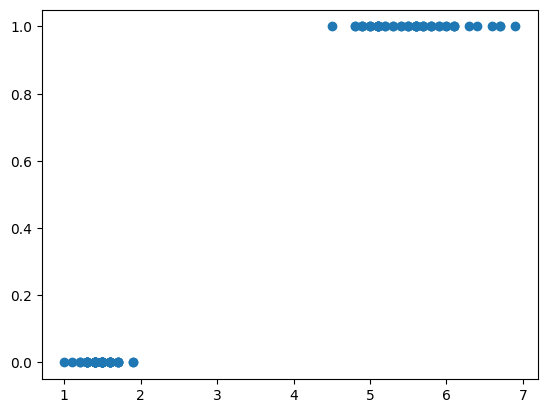

In [358]:
plt.scatter(x_train['PetalLengthCm'],y)
plt.plot()